In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)

file read
strings converted to numbers
q-values estimated
ranks computed
features normed
file ready


Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/2 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/2 done!


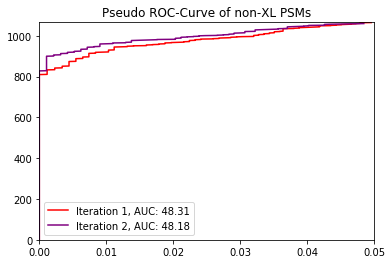

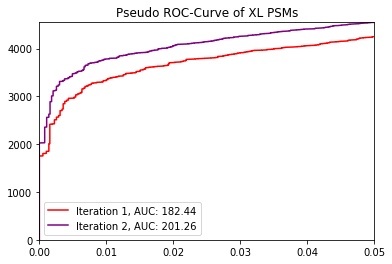

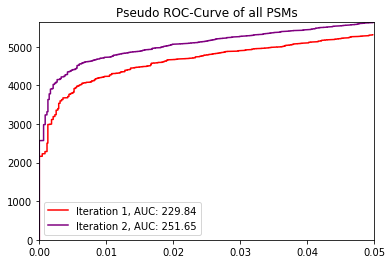

In [2]:
p = percolator(dSlow, idCol, excluded, I = 2, plotEveryIter = True, plotSaveName = 'Test.png')

In [7]:
features = [x for x in list(dSlow.columns) if (x not in excluded)]

In [8]:
dSlow.sort_values('SpecId',inplace = True, kind = 'mergesort')
dSlow[['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'Rank']].head()

,SpecId,Label,ScanNr,Peptide,Proteins,Rank
18317,controllerType=0controllerNumber=1scan=10001,0,10001,K.n[+43.005814000000001]YPFYSGPESCCYK[+43.0058...,DECOY_sp|A6NKW6|SHL2B_HUMAN,1
18318,controllerType=0controllerNumber=1scan=10004,1,10004,R.VVSAPVGKETPSKR.M,sp|Q13416|ORC2_HUMAN,1
18319,controllerType=0controllerNumber=1scan=10004,0,10004,R.LM[+15.994915000000001]GAPSMLARLSFDGR.Q,DECOY_sp|O75144|ICOSL_HUMAN,2
18320,controllerType=0controllerNumber=1scan=10004,0,10004,R.GPSLPSCTTPSCGGM[+15.994915000000001]NM[+15.9...,DECOY_sp|Q17RG1|KCD19_HUMAN,3
18321,controllerType=0controllerNumber=1scan=10004,1,10004,R.WEATPWTACSSSCGGGIQSR.A,sp|Q8N6G6|ATL1_HUMAN,4
18322,controllerType=0controllerNumber=1scan=10005,1,10005,R.LAYIAHPK.L,sp|P47914|RL29_HUMAN,1
18323,controllerType=0controllerNumber=1scan=10005,0,10005,K.NPVCPTHPK.R,DECOY_sp|O76039|CDKL5_HUMAN,2
18324,controllerType=0controllerNumber=1scan=10005,0,10005,K.CFGCQKNGHPK.R,DECOY_sp|Q92576|PHF3_HUMAN,3
18325,controllerType=0controllerNumber=1scan=10006,1,10006,K.EVEKLQEKR.E,sp|O00139|KIF2A_HUMAN,1
18326,controllerType=0controllerNumber=1scan=10006,0,10006,R.VEEIKCICFRK.C,DECOY_sp|P29375|KDM5A_HUMAN,2


In [40]:
idParts = np.array_split(list(set(dSlow['SpecId'].sample(frac = 1, replace = False))), 3)

In [43]:
threeParts = [dSlow.loc[dSlow['SpecId'].isin(idParts[x])] for x in range(3)]

In [2]:
dSlow.sort_values('SpecId', inplace = True)
dSlow.set_index(keys = ['SpecId'], drop = True, inplace = True)
dSlow.head()

,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,charge5,...,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,class-specific_q-val,Rank
SpecId,,,,,,,,,,,,,,,,,,,,,
controllerType=0controllerNumber=1scan=10001,0,10001,0.400295,0.400294,0.400295,0.159091,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,K.n[+43.005814000000001]YPFYSGPESCCYK[+43.0058...,DECOY_sp|A6NKW6|SHL2B_HUMAN,0.456593,0.456587,0.493440,1
controllerType=0controllerNumber=1scan=10004,1,10004,0.142831,0.142831,0.142831,0.318182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.WEATPWTACSSSCGGGIQSR.A,sp|Q8N6G6|ATL1_HUMAN,0.444948,0.444926,0.485284,4
controllerType=0controllerNumber=1scan=10004,1,10004,0.142831,0.142834,0.142831,0.181818,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,R.VVSAPVGKETPSKR.M,sp|Q13416|ORC2_HUMAN,0.379845,0.379834,0.376681,1
controllerType=0controllerNumber=1scan=10004,0,10004,0.142831,0.142833,0.142831,0.227273,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,R.LM[+15.994915000000001]GAPSMLARLSFDGR.Q,DECOY_sp|O75144|ICOSL_HUMAN,0.415661,0.415633,0.407260,2
controllerType=0controllerNumber=1scan=10004,0,10004,0.142831,0.142832,0.142831,0.340909,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.GPSLPSCTTPSCGGM[+15.994915000000001]NM[+15.9...,DECOY_sp|Q17RG1|KCD19_HUMAN,0.441123,0.441111,0.480028,3


In [5]:
dSlow.loc['controllerType=0controllerNumber=1scan=10004']

,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,charge5,...,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,class-specific_q-val,Rank
SpecId,,,,,,,,,,,,,,,,,,,,,
controllerType=0controllerNumber=1scan=10004,1,10004,0.142831,0.142831,0.142831,0.318182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.WEATPWTACSSSCGGGIQSR.A,sp|Q8N6G6|ATL1_HUMAN,0.444948,0.444926,0.485284,4
controllerType=0controllerNumber=1scan=10004,1,10004,0.142831,0.142834,0.142831,0.181818,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,R.VVSAPVGKETPSKR.M,sp|Q13416|ORC2_HUMAN,0.379845,0.379834,0.376681,1
controllerType=0controllerNumber=1scan=10004,0,10004,0.142831,0.142833,0.142831,0.227273,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,R.LM[+15.994915000000001]GAPSMLARLSFDGR.Q,DECOY_sp|O75144|ICOSL_HUMAN,0.415661,0.415633,0.407260,2
controllerType=0controllerNumber=1scan=10004,0,10004,0.142831,0.142832,0.142831,0.340909,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.GPSLPSCTTPSCGGM[+15.994915000000001]NM[+15.9...,DECOY_sp|Q17RG1|KCD19_HUMAN,0.441123,0.441111,0.480028,3


In [3]:
group = dSlow.groupby(['SpecId'])

In [5]:
group.first()

,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,charge5,...,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,class-specific_q-val,Rank
SpecId,,,,,,,,,,,,,,,,,,,,,
controllerType=0controllerNumber=1scan=10001,0,10001,0.400295,0.400294,0.400295,0.159091,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,K.n[+43.005814000000001]YPFYSGPESCCYK[+43.0058...,DECOY_sp|A6NKW6|SHL2B_HUMAN,0.456593,0.456587,0.493440,1
controllerType=0controllerNumber=1scan=10004,1,10004,0.142831,0.142834,0.142831,0.181818,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,R.VVSAPVGKETPSKR.M,sp|Q13416|ORC2_HUMAN,0.379845,0.379834,0.376681,1
controllerType=0controllerNumber=1scan=10005,1,10005,0.220047,0.220047,0.220047,0.045455,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,R.LAYIAHPK.L,sp|P47914|RL29_HUMAN,0.166127,0.166109,0.179484,1
controllerType=0controllerNumber=1scan=10006,1,10006,0.191823,0.191826,0.191823,0.068182,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,K.EVEKLQEKR.E,sp|O00139|KIF2A_HUMAN,0.350386,0.350359,0.349885,1
controllerType=0controllerNumber=1scan=10007,1,10007,0.107902,0.107903,0.107902,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,K.n[+43.005814000000001]TYATK[+43.005814000000...,sp|O60383|GDF9_HUMAN,0.271363,0.271363,0.279271,1
controllerType=0controllerNumber=1scan=10008,1,10008,0.406888,0.406887,0.406888,0.068182,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,R.HGYIKGIVK.D,sp|P62917|RL8_HUMAN,0.369397,0.369380,0.367061,1
controllerType=0controllerNumber=1scan=10010,1,10010,0.201754,0.201754,0.201754,0.068182,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,K.YKPLDLRPK.K,sp|P42766|RL35_HUMAN,0.365465,0.365465,0.363175,1
controllerType=0controllerNumber=1scan=10012,1,10012,0.480700,0.480699,0.480700,0.204545,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,R.NDTKEDVFVHQTAIK.K,"sp|P16989|YBOX3_HUMAN, sp|P67809|YBOX1_HUMAN, ...",0.000000,0.000000,0.000000,1
controllerType=0controllerNumber=1scan=10013,1,10013,0.188905,0.188905,0.188905,0.136364,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,K.EDVFVHQTAIKK.N,"sp|P16989|YBOX3_HUMAN, sp|P67809|YBOX1_HUMAN",0.119424,0.119378,0.128182,1
